載入相關套件

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, datasets, models

載入資料集

In [ ]:
import ssl

# # 設定預設的 HTTPS context，避免在某些環境下載資料集時出現 SSL 錯誤
# ssl._create_default_https_context = ssl._create_default_https_context

# 從 Keras 的 datasets 模組載入 CIFAR-10 資料集
# CIFAR-10 是一個常用的影像分類資料集，包含 10 種類別的彩色圖片（每張圖片為 32x32 像素）
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 將影像資料標準化：把像素值從 0~255 轉換為 0~1 之間的浮點數，有助於神經網路訓練收斂
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


建立CNN卷積神經網路

In [ ]:
# 建立一個序列模型（Sequential），用來堆疊各層神經網路
model = models.Sequential()
model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)))  # 使用 16 個 5x5 的卷積核，輸入圖像大小為 32x32 像素、3 個色彩通道（RGB）
model.add(layers.MaxPooling2D((2, 2)))                         # 最大池化層（MaxPooling）：將特徵圖下採樣，減少尺寸和參數
model.add(layers.Conv2D(16, (5, 5), activation='relu'))               # 第二層：卷積層，與前面相同使用 16 個 5x5 的濾鏡與 ReLU
model.add(layers.MaxPooling2D((2, 2)))                         # 最大池化層，繼續下採樣
model.add(layers.Conv2D(32, (5, 5), activation='relu'))               # 第三層：卷積層，使用更多的濾鏡（32 個 5x5 濾鏡）以提取更高階的特徵
model.add(layers.Flatten())                               # 展平層（Flatten）：將多維的特徵圖攤平成一維向量，用於輸入全連接層
model.add(layers.Dense(10, activation='softmax'))    # 全連接層（Dense）：輸出節點為 10 個，對應 CIFAR-10 的 10 個分類類別softmax 將輸出轉換為每個類別的機率值
model.summary()                     # 顯示模型的結構摘要，包括每層的輸出形狀與參數數量

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,794 (81.23 KB)

 Trainable params: 20,794 (81.23 KB)

 Non-trainable params: 0 (0.00 B)

開始訓練

In [ ]:
# 編譯模型，設定訓練所使用的優化器、損失函數與評估指標

model.compile(
  optimizer='adam',  # 使用 Adam 最佳化器，能自動調整學習率，訓練效果穩定
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 使用 SparseCategoricalCrossentropy 作為損失函數（適用於整數類別標籤）
  metrics=['accuracy']  # 訓練與驗證時會評估準確率
)

# 訓練模型
history = model.fit(
  train_images,             # 訓練影像資料
  train_labels,             # 訓練標籤
  epochs=10,              # 訓練 10 個週期（epoch）
  batch_size=10,            # 每次訓練批次大小為 10 筆資料(iterations)
  validation_data=(test_images, test_labels)  # 使用測試集作為驗證資料
)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 71s 14ms/step - accuracy: 0.3253 - loss: 1.8152 - val_accuracy: 0.4865 - val_loss: 1.4107
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 72s 12ms/step - accuracy: 0.4995 - loss: 1.3991 - val_accuracy: 0.4919 - val_loss: 1.4296
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 81s 12ms/step - accuracy: 0.5412 - loss: 1.2920 - val_accuracy: 0.5452 - val_loss: 1.2677
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 59s 12ms/step - accuracy: 0.5758 - loss: 1.1971 - val_accuracy: 0.5921 - val_loss: 1.1781
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 84s 12ms/step - accuracy: 0.5962 - loss: 1.1493 - val_accuracy: 0.5884 - val_loss: 1.1706
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 79s 12ms/step - accuracy: 0.6124 - loss: 1.0993 - val_accuracy: 0.6159 - val_loss: 1.1218
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 59s 12ms/step - accuracy: 0.6280 - loss: 1.0572 - val_accuracy: 0.6197 - val_loss: 1.0900
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.6345 -

檢查訓練結果

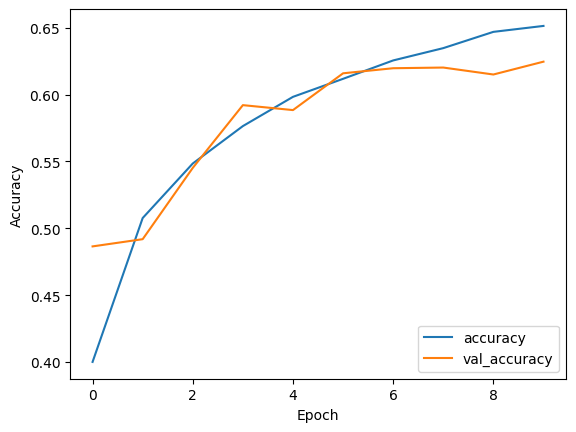

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

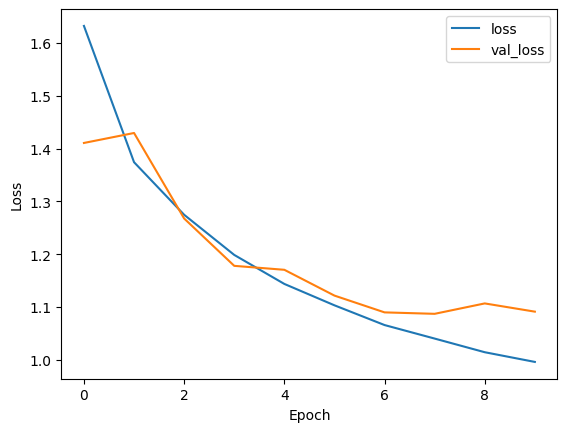

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

儲存模型

In [ ]:
model.save('./CNN.keras')

開始辨識

In [ ]:
import numpy as np
import matplotlib.image as mpimg

In [ ]:
def convert_img(img_path, resize=(32, 32)):
  img_string = tf.io.read_file(img_path)        # 讀取圖片檔案（讀成二進位字串格式）
  img_decode = tf.image.decode_image(img_string)    # 將二進位格式的圖片解碼為張量（Tensor）
  img_decode = tf.image.resize(img_decode, resize)  # 調整圖片大小（這裡調整為模型輸入要求的 32x32 大小）
  img_decode = img_decode / 255.0          # 將像素值從 0~255 正規化為 0~1（有助於模型訓練與預測）
  img_decode = tf.expand_dims(img_decode, axis=0)   # 增加一個 batch 維度，從 (32, 32, 3) 變成 (1, 32, 32, 3)，以符合模型輸入格式
  return img_decode                   # 回傳處理後的圖片資料

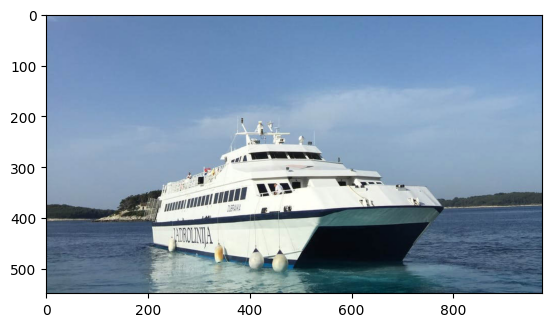

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
airplane


In [ ]:
img_path = './test.jpg' # 指定要預測的圖片路徑

CNN_Load = tf.keras.models.load_model('./CNN.keras')  # 載入已經訓練好的 CNN 模型（.keras 格式）

# CIFAR-10 的分類標籤名稱（對應索引 0～9）
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# 顯示圖片
pic = mpimg.imread(img_path)  # 使用 matplotlib 讀取圖片
imgplot = plt.imshow(pic)    # 顯示圖片內容
plt.show()             # 顯示圖像視窗

img = convert_img(img_path)     # 使用前面定義的函式將圖片轉換成模型輸入格式
predictions = CNN_Load.predict(img) # 使用 CNN 模型進行預測

# 將預測結果轉換為對應的分類名稱，並印出來
print(class_names[np.argmax(predictions)])  # 印出機率最高的分類名稱